## Assignments

To help you find your bearings with regard to t-tests, calculate the t-values for the following numbers:

1. $\bar{y_1}= 5$, $\bar{y_2}= 8$, $s_1= 1$, $s_2= 3$, $N_1= 200$, $N_2= 500$
2. $\bar{y_1}= 1090$, $\bar{y_2}= 999$, $s_1= 400$, $s_2= 30$, $N_1= 900$, $N_2= 100$
3. $\bar{y_1}= 45$, $\bar{y_2}= 40$, $s_1= 45$, $s_2= 40$, $N_1= 2000$, $N_2= 2000$

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Keeping the random data the same over multiple runs of the code.
np.random.seed(42)

#Storing our randomly generated data and labels.
data = []
groups = []
labels_var = []
labels_size = []

#The values we use for the standard deviations and the sample sizes.
variability = [45,40]
sizes = [2000, 2000]

#Generating data for each group for each combination of variability and sample size.
for var in variability:
    for size in sizes:
        data.extend(np.random.normal(45,var,size))
        data.extend(np.random.normal(40,var,size))
        labels_var.extend([var]*size*2)
        labels_size.extend([size]*size*2)
        groups.extend(['group1']*size)
        groups.extend(['group2']*size)


In [15]:
#Putting the data together in a data frame and checking it.

data = pd.DataFrame({'data': data, 
                     'groups' : groups,
                    'variability':labels_var,
                    'size':labels_size})
print(data.head())



         data  groups  variability  size
0   67.352137  group1           45  2000
1   38.778106  group1           45  2000
2   74.145984  group1           45  2000
3  113.536344  group1           45  2000
4   34.463098  group1           45  2000


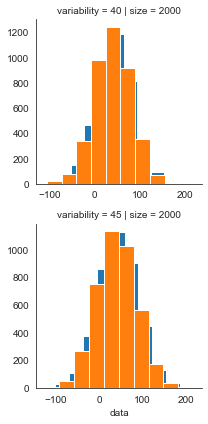

In [16]:
# Plotting the data.  
# Because we organized the data frame in a stacked (long) format, the plotting code is very straightforward.
sns.set_style('white')

g = sns.FacetGrid(data, col="size", row="variability", hue='groups', sharex=False, sharey=False)
g.map(plt.hist,'data')
plt.show()

In [17]:
# Setting the three non-data columns to work as multi-indices. 
# This makes it much easier to get subsections of stacked data.
data_test = data.set_index(['groups','size','variability'])

# Storing our t-values and p-values (we'll get to p-values in a sec).
tvalues=[]
pvalues=[]

#For each combination of sample size and variability, compare the two groups using a t-test
for size in sizes:
    for var in variability:
        a = data_test['data'].xs(('group1',size,var),level=('groups','size','variability'))
        b = data_test['data'].xs(('group2',size,var),level=('groups','size','variability'))
        tval,pval=stats.ttest_ind(b, a,equal_var=True)
        tvalues.append(tval)
        pvalues.append(pval)


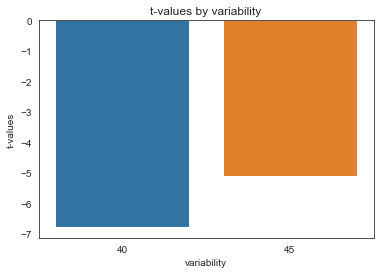

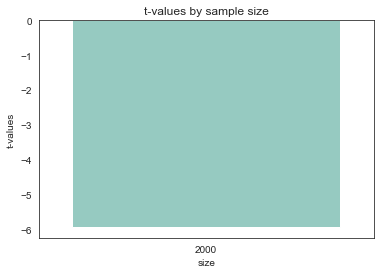

In [18]:
#Creating a data frame for plotting purposes.
tvalues_plot=pd.DataFrame({'t':tvalues,
                           'p':pvalues,
                          'variability':variability*2,
                          'size':np.repeat(sizes,2)})

# t-values by variability
ax = sns.barplot(y='t',x='variability',ci=None,data=tvalues_plot)
ax.set(ylabel='t-values',title='t-values by variability')
plt.show()

# t-values by sample size
ax = sns.barplot(y='t',x='size',ci=None,data=tvalues_plot,palette='Set3')
ax.set(ylabel='t-values',title='t-values by sample size')
plt.show()